In [2]:
!pip3 install pyspark


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this er

In [10]:
!which python3

/opt/homebrew/bin/python3


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("BankingChurnETL") \
    .getOrCreate()

spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/07 22:10:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Read from CSV (adjust path if using DBFS or S3)
df = spark.read.option("header", True).option("inferSchema", True).csv("BankCustomerChurnPrediction.csv")
df.show(5)

+-----------+------------+-------+------+---+------+---------+---------------+-----------+-------------+----------------+-----+
|customer_id|credit_score|country|gender|age|tenure|  balance|products_number|credit_card|active_member|estimated_salary|churn|
+-----------+------------+-------+------+---+------+---------+---------------+-----------+-------------+----------------+-----+
|   15634602|         619| France|Female| 42|     2|      0.0|              1|          1|            1|       101348.88|    1|
|   15647311|         608|  Spain|Female| 41|     1| 83807.86|              1|          0|            1|       112542.58|    0|
|   15619304|         502| France|Female| 42|     8| 159660.8|              3|          1|            0|       113931.57|    1|
|   15701354|         699| France|Female| 39|     1|      0.0|              2|          0|            0|        93826.63|    0|
|   15737888|         850|  Spain|Female| 43|     2|125510.82|              1|          1|            1|

In [4]:
display(df.limit(10))
df.printSchema()
df.count()

DataFrame[customer_id: int, credit_score: int, country: string, gender: string, age: int, tenure: int, balance: double, products_number: int, credit_card: int, active_member: int, estimated_salary: double, churn: int]

root
 |-- customer_id: integer (nullable = true)
 |-- credit_score: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- balance: double (nullable = true)
 |-- products_number: integer (nullable = true)
 |-- credit_card: integer (nullable = true)
 |-- active_member: integer (nullable = true)
 |-- estimated_salary: double (nullable = true)
 |-- churn: integer (nullable = true)



10000

In [5]:
df.describe().toPandas()

25/04/07 22:10:21 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,summary,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,mean,1.56909405694E7,650.5288,None,None,38.9218,5.0128,76485.88928799961,1.5302,0.7055,0.5151,100090.2398809998,0.2037
2,stddev,71936.18612274907,96.65329873613035,None,None,10.487806451704587,2.8921743770496837,62397.40520238599,0.5816543579989917,0.45584046447513327,0.49979692845891815,57510.49281769821,0.40276858399486065
3,min,15565701,350,France,Female,18,0,0.0,1,0,0,11.58,0
4,max,15815690,850,Spain,Male,92,10,250898.09,4,1,1,199992.48,1


In [6]:
from pyspark.sql.functions import col, isnan, when, count

In [7]:
df.groupBy("churn").count().show()
total = df.count()
df.groupBy("churn").count().withColumn("percent", col("count") * 100 / total).show()

+-----+-----+
|churn|count|
+-----+-----+
|    1| 2037|
|    0| 7963|
+-----+-----+

+-----+-----+-------+
|churn|count|percent|
+-----+-----+-------+
|    1| 2037|  20.37|
|    0| 7963|  79.63|
+-----+-----+-------+



In [8]:
import pandas as pd

df_pd = df.toPandas()

In [9]:
!pip3 install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this er

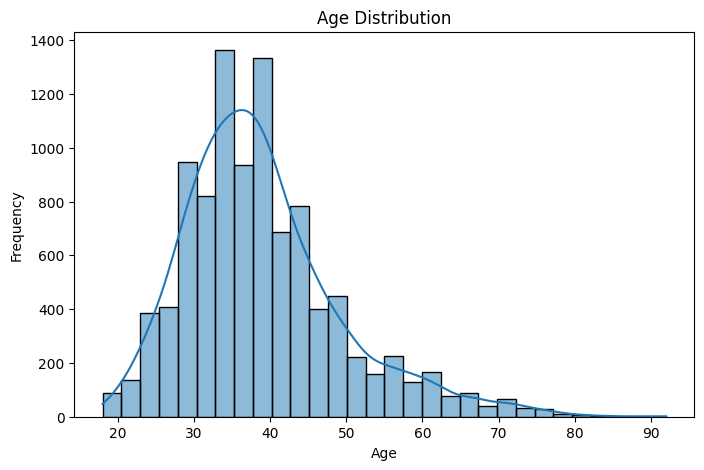

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_pd['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

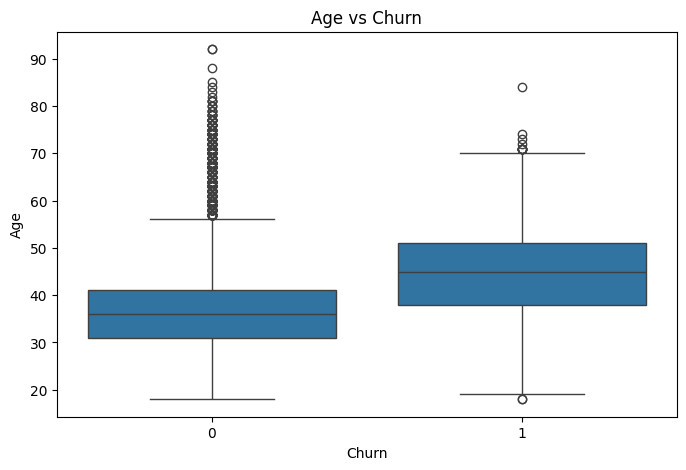

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='age', data=df_pd)
plt.title('Age vs Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

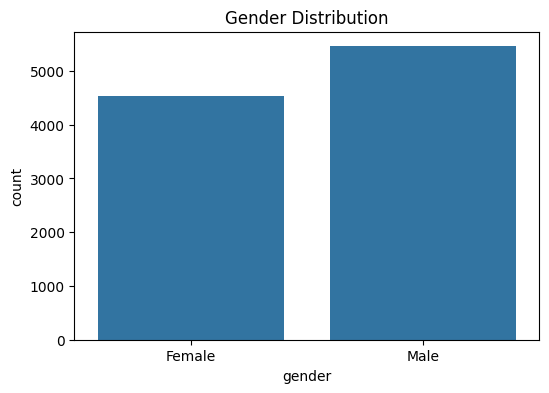

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df_pd)
plt.title('Gender Distribution')
plt.show()

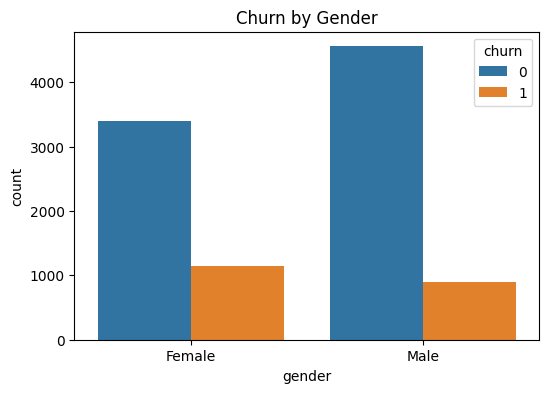

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='churn', data=df_pd)
plt.title('Churn by Gender')
plt.show()

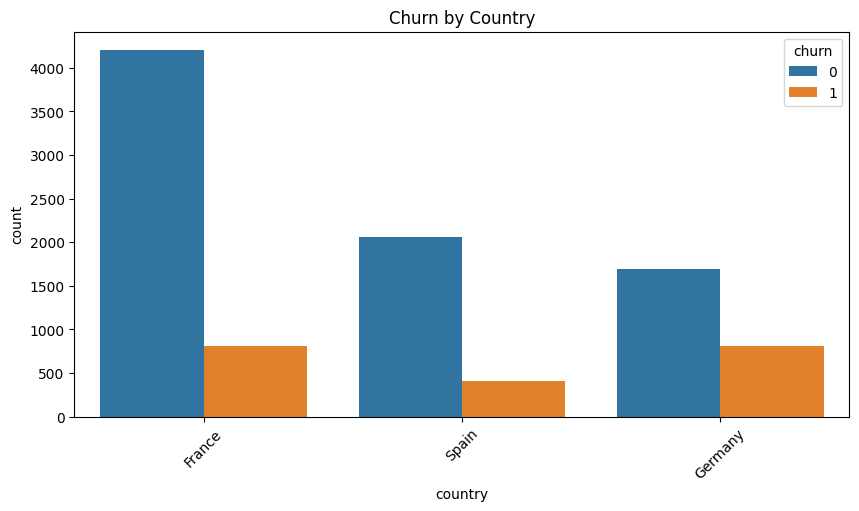

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='country', hue='churn', data=df_pd)
plt.title('Churn by Country')
plt.xticks(rotation=45)
plt.show()

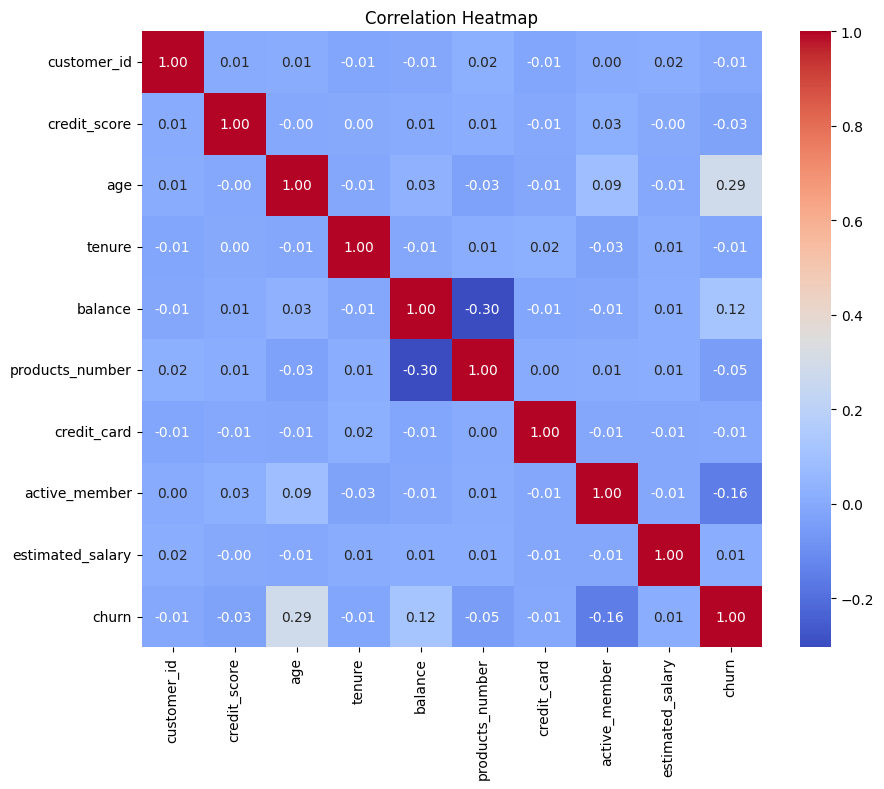

In [14]:
plt.figure(figsize=(10, 8))
corr = df_pd.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from pyspark.sql.functions import col, sum, when, isnan

df.select([
    sum(when(col(c).isNull() | isnan(c), 1).otherwise(0)).alias(c)
    for c in df.columns
]).show()

+-----------+------------+-------+------+---+------+-------+---------------+-----------+-------------+----------------+-----+
|customer_id|credit_score|country|gender|age|tenure|balance|products_number|credit_card|active_member|estimated_salary|churn|
+-----------+------------+-------+------+---+------+-------+---------------+-----------+-------------+----------------+-----+
|          0|           0|      0|     0|  0|     0|      0|              0|          0|            0|               0|    0|
+-----------+------------+-------+------+---+------+-------+---------------+-----------+-------------+----------------+-----+



In [16]:
original_count = df.count()
deduped_count = df.dropDuplicates().count()

print(f"Total rows: {original_count}")
print(f"After dropping duplicates: {deduped_count}")
print(f"Duplicate rows found: {original_count - deduped_count}")

CodeCache: size=131072Kb used=33269Kb max_used=33273Kb free=97802Kb
 bounds [0x0000000106760000, 0x0000000108810000, 0x000000010e760000]
 total_blobs=11986 nmethods=11030 adapters=867
 compilation: disabled (not enough contiguous free space left)
Total rows: 10000
After dropping duplicates: 10000
Duplicate rows found: 0


Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


In [17]:
selected_cols = [
    'credit_score', 'age', 'tenure', 'balance', 
    'products_number', 'active_member', 
    'country', 'gender', 'churn'
]

df_selected = df.select(selected_cols)

In [18]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Index categorical columns
country_indexer = StringIndexer(inputCol="country", outputCol="country_index")
gender_indexer = StringIndexer(inputCol="gender", outputCol="gender_index")

# One-hot encode the indexed columns
country_encoder = OneHotEncoder(inputCols=["country_index"], outputCols=["country_ohe"])
gender_encoder = OneHotEncoder(inputCols=["gender_index"], outputCols=["gender_ohe"])

In [25]:
from pyspark.ml import Pipeline

index_pipeline = Pipeline(stages=[country_indexer, gender_indexer])
indexed_df = index_pipeline.fit(df).transform(df)

indexed_df.select("country", "country_index", "gender", "gender_index").show(10)

+-------+-------------+------+------------+
|country|country_index|gender|gender_index|
+-------+-------------+------+------------+
| France|          0.0|Female|         1.0|
|  Spain|          2.0|Female|         1.0|
| France|          0.0|Female|         1.0|
| France|          0.0|Female|         1.0|
|  Spain|          2.0|Female|         1.0|
|  Spain|          2.0|  Male|         0.0|
| France|          0.0|  Male|         0.0|
|Germany|          1.0|Female|         1.0|
| France|          0.0|  Male|         0.0|
| France|          0.0|  Male|         0.0|
+-------+-------------+------+------------+
only showing top 10 rows



In [26]:
encoder_pipeline = Pipeline(stages=[country_encoder, gender_encoder])
encoded_df = encoder_pipeline.fit(indexed_df).transform(indexed_df)

encoded_df.select("country", "country_index", "country_ohe", 
                  "gender", "gender_index", "gender_ohe").show(10, truncate=False)

+-------+-------------+-------------+------+------------+-------------+
|country|country_index|country_ohe  |gender|gender_index|gender_ohe   |
+-------+-------------+-------------+------+------------+-------------+
|France |0.0          |(2,[0],[1.0])|Female|1.0         |(1,[],[])    |
|Spain  |2.0          |(2,[],[])    |Female|1.0         |(1,[],[])    |
|France |0.0          |(2,[0],[1.0])|Female|1.0         |(1,[],[])    |
|France |0.0          |(2,[0],[1.0])|Female|1.0         |(1,[],[])    |
|Spain  |2.0          |(2,[],[])    |Female|1.0         |(1,[],[])    |
|Spain  |2.0          |(2,[],[])    |Male  |0.0         |(1,[0],[1.0])|
|France |0.0          |(2,[0],[1.0])|Male  |0.0         |(1,[0],[1.0])|
|Germany|1.0          |(2,[1],[1.0])|Female|1.0         |(1,[],[])    |
|France |0.0          |(2,[0],[1.0])|Male  |0.0         |(1,[0],[1.0])|
|France |0.0          |(2,[0],[1.0])|Male  |0.0         |(1,[0],[1.0])|
+-------+-------------+-------------+------+------------+-------

In [28]:
from pyspark.ml.feature import VectorAssembler

feature_cols = [
    'credit_score', 'age', 'tenure', 'balance', 
    'products_number', 'active_member', 
    'country_ohe', 'gender_ohe'
]

assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features"
)

In [30]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[
    country_indexer,
    gender_indexer,
    country_encoder,
    gender_encoder,
    assembler
])
df_prepared = pipeline.fit(df_selected).transform(df_selected)

In [31]:
train_df, test_df = df_prepared.randomSplit([0.8, 0.2], seed=42)

In [32]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="features", labelCol="churn")
lr_model = lr.fit(train_df)
predictions = lr_model.transform(test_df)

25/04/08 01:22:17 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


In [33]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="churn", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc:.4f}")

AUC: 0.7773
